source: https://www.kaggle.com/hoonkeng/deep-analysis-on-youtube-trending-videos-eda/notebook


In [2]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\kerrs\Desktop\Data-files\dataframe.csv")
df_all_timestamps = pd.read_csv(r"C:\Users\kerrs\Desktop\Data-files\dataframe_all_timestamps.csv")

In [4]:
import numpy as np

df.loc[:,'log_views'] = np.log(df.loc[:,'views']+1)
df.loc[:,'log_likes'] = np.log(df.loc[:,'likes']+1)
df.loc[:,'log_dislikes'] = np.log(df.loc[:,'dislikes']+1)
df.loc[:,'log_comment_count'] = np.log(df.loc[:,'comment_count']+1)

#show all columns
pd.set_option('display.max_columns', 100)

In [5]:
def stringify(row):
    return str(row['publish_date']) + ' ' + str(row['publish_time'])

df_all_timestamps.loc[:,'string_date_time'] = \
                            df_all_timestamps.apply(stringify, axis=1)

df_all_timestamps.loc[:,'publish_timestamp'] = \
                pd.to_datetime(df_all_timestamps['string_date_time'],
                                infer_datetime_format=True,
                                errors='coerce')

df_all_timestamps = df_all_timestamps.drop('string_date_time', axis=1)


#make a new column in df called 'publish_timestamp' 
#that is a datetime object

df.loc[:,'string_date_time'] = df.apply(stringify, axis=1)
df.loc[:,'publish_timestamp'] = \
                pd.to_datetime(df['string_date_time'],
                                infer_datetime_format=True,
                                errors='coerce')
df = df.drop('string_date_time', axis=1)

# Project Focus: Analysis of 5 'Esports' Games


In [7]:
#importing pandasql to take advantage of querying
import pandasql as ps

In [8]:
pysqldf = lambda q: sqldf(q, globals())

In [9]:
q1 = "SELECT * FROM df WHERE tags LIKE '%League of Legends%';"
LoL = ps.sqldf(q1,locals())
LoL.shape

(79, 24)

In [10]:
q2 = "SELECT * FROM df WHERE tags LIKE '%Hearthstone%';"
Hearth = ps.sqldf(q2,locals())
Hearth.shape

(10, 24)

In [11]:
q3 = "SELECT * FROM df WHERE tags LIKE '%Dota2%';"
Dota2 = ps.sqldf(q3,locals())
Dota2.shape

(31, 24)

In [12]:
q4 = "SELECT * FROM df WHERE tags LIKE '%Counter-Strike%';"
CS = ps.sqldf(q4,locals())
CS.shape

(14, 24)

In [14]:
q5 = "SELECT * FROM df WHERE tags LIKE '%OverWatch%';"
OW = ps.sqldf(q5, locals())

In [15]:
LoL['game'] = 'LoL'

Dota2['game'] = 'Dota2'

CS['game'] = 'CS'

Hearth['game'] = 'Hearth'

OW['game'] = 'OW'

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)}, style = 'darkgrid')
ax = sns.countplot(x = 'country', data = new)

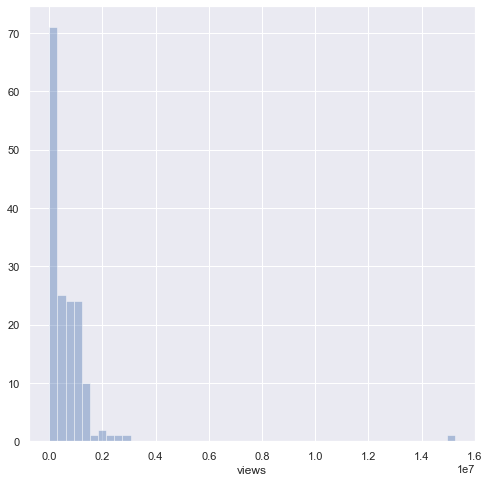

In [82]:
sns.set(rc={'figure.figsize':(8,8)}, style = 'darkgrid')
sns.distplot(OW["views"], kde = False)

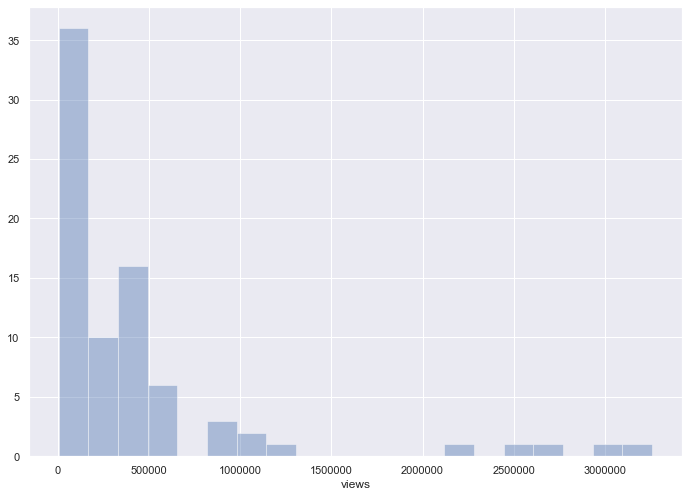

In [34]:
sns.distplot(LoL["views"], kde = False)

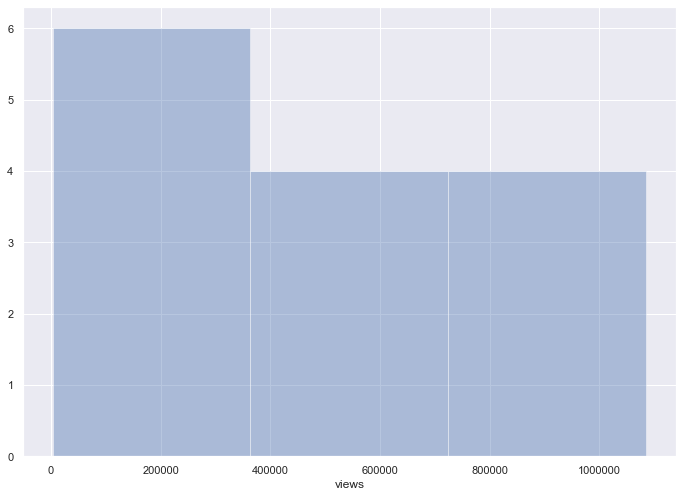

In [50]:
sns.distplot(CS["views"], kde = False)

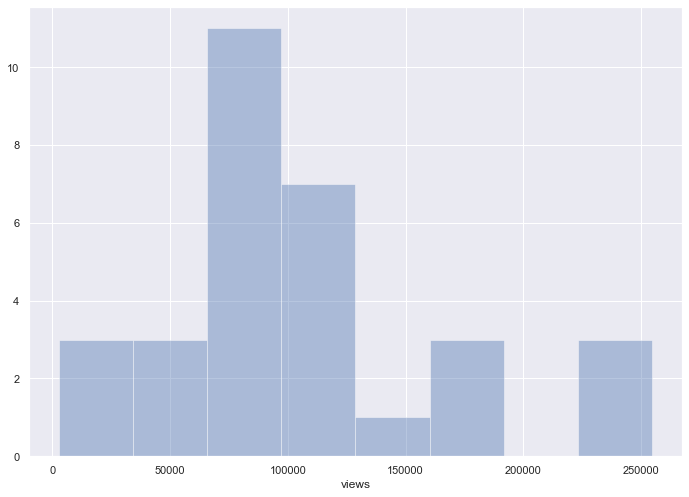

In [51]:
sns.distplot(Dota2["views"], kde = False)

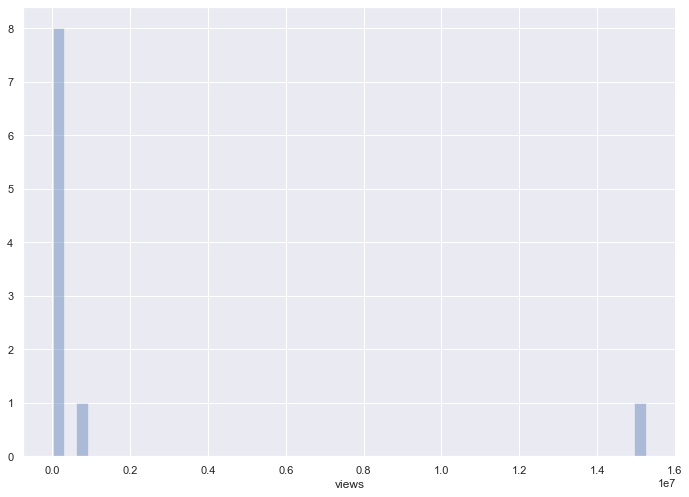

In [54]:
sns.distplot(Hearth["views"], kde = False)

In [101]:
new = pd.concat([LoL,OW,Dota2, CS, Hearth], axis = 0)
new.shape



(295, 25)

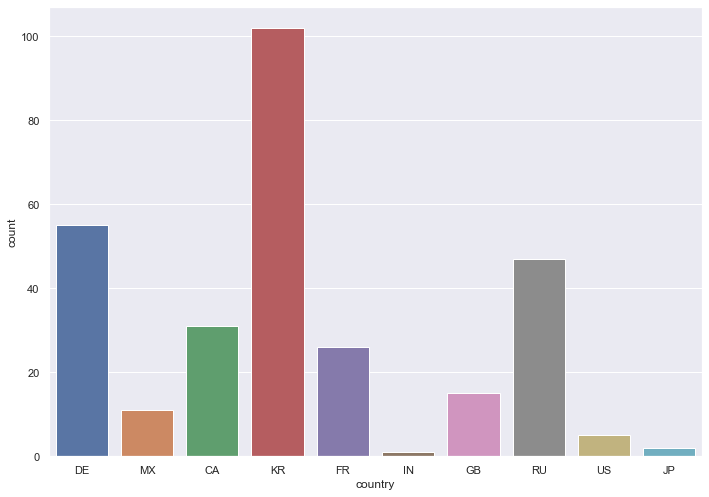

In [28]:
sns.set(rc={'figure.figsize':(11.7,8.27)}, style = 'darkgrid')
ax = sns.countplot(x = 'country', data = new)

In [65]:
pd.value_counts(new['country'].values, sort=True)

KR    102
DE     55
RU     47
CA     31
FR     26
GB     15
MX     11
US      5
JP      2
IN      1
dtype: int64

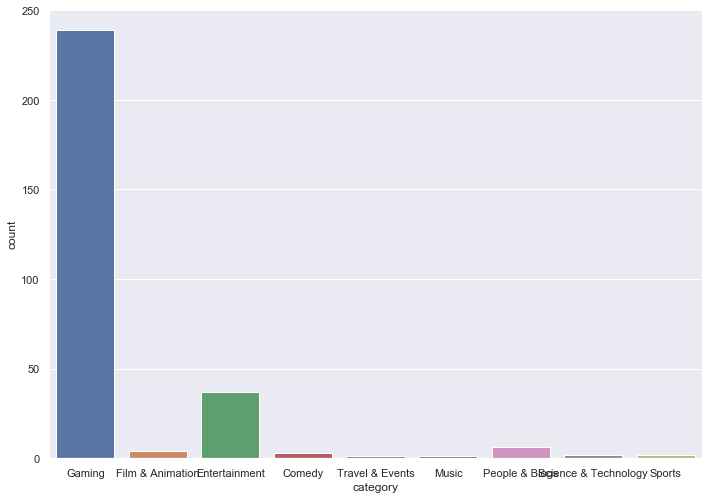

In [44]:
sns.set(rc={'figure.figsize':(11.7,8.27)}, style = 'darkgrid')
ax = sns.countplot(x = 'category', data = new)

In [66]:
pd.value_counts(new['category'].values, sort=True)

Gaming                  239
Entertainment            37
People & Blogs            6
Film & Animation          4
Comedy                    3
Science & Technology      2
Sports                    2
Music                     1
Travel & Events           1
dtype: int64

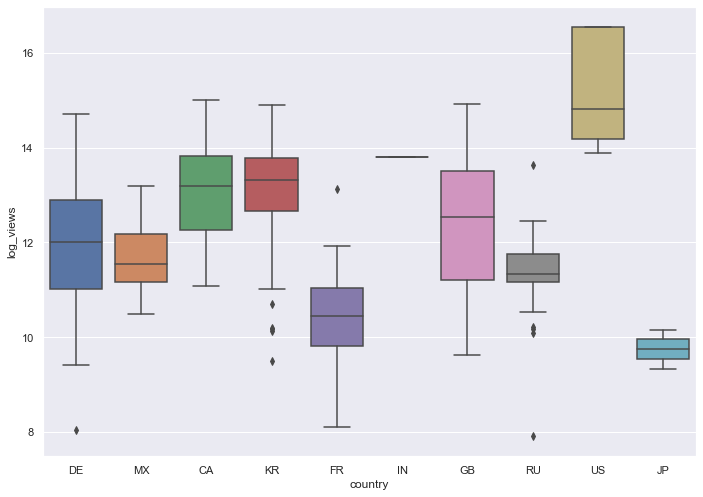

In [68]:
sns.set(rc={'figure.figsize':(11.7,8.27)}, style = 'darkgrid')
ax = sns.boxplot(x = 'country', y = 'log_views', data = new)

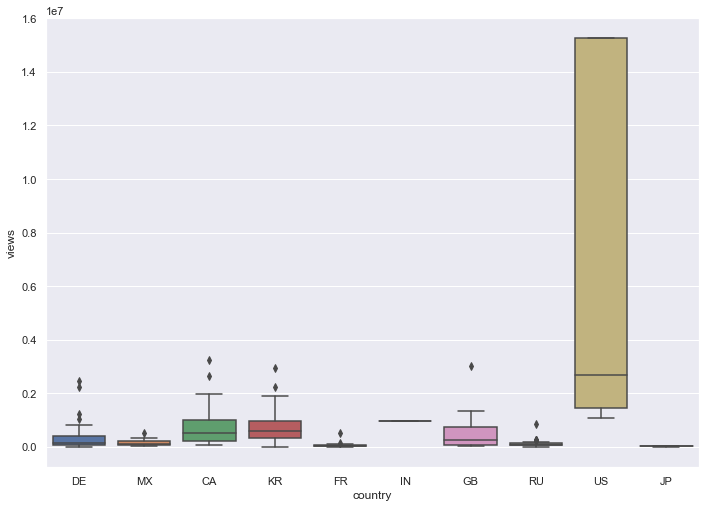

In [55]:
sns.set(rc={'figure.figsize':(11.7,8.27)}, style = 'darkgrid')
ax = sns.boxplot(x = 'country', y = 'views', data = new)

In [120]:
import datetime 
new['month'] = pd.DatetimeIndex(new['publish_date']).month
new.shape

(295, 26)

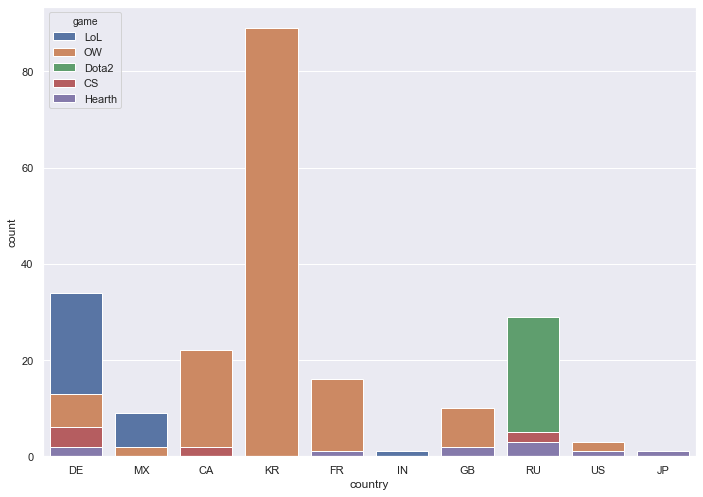

In [126]:
sns.set(rc={'figure.figsize':(11.7,8.27)}, style = 'darkgrid')
ax = sns.countplot(x = 'country', hue ='game', data = new, dodge = False)

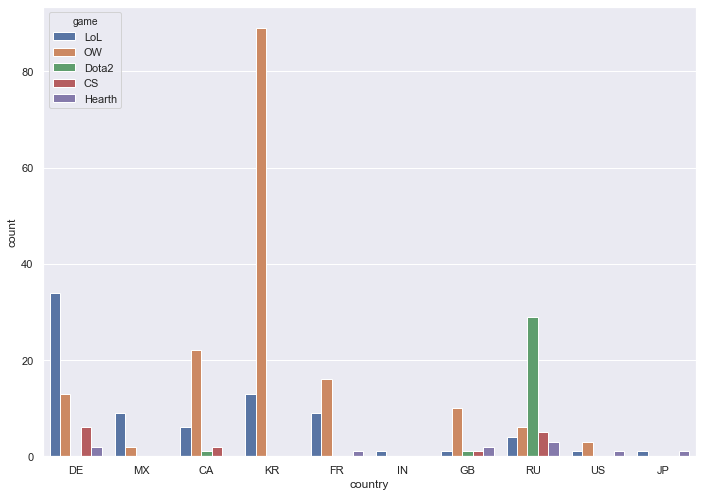

In [27]:
sns.set(rc={'figure.figsize':(11.7,8.27)}, style = 'darkgrid')
ax = sns.countplot(x = 'country', hue ='game', data = new, dodge = True)

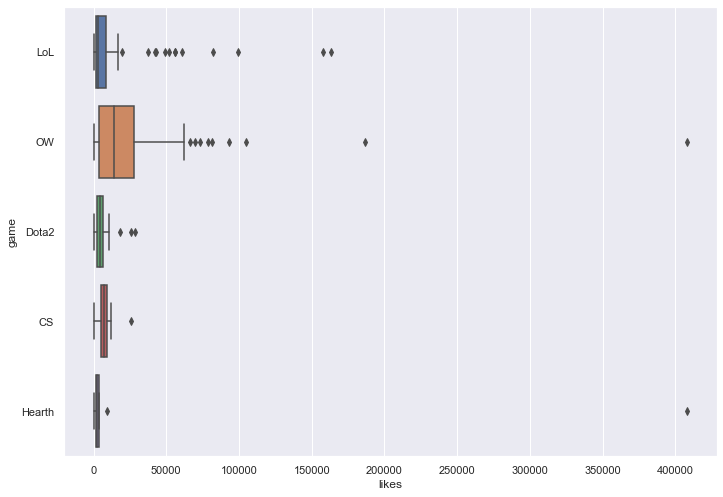

In [33]:
sns.boxplot(y = "game", x = 'likes', data = new)

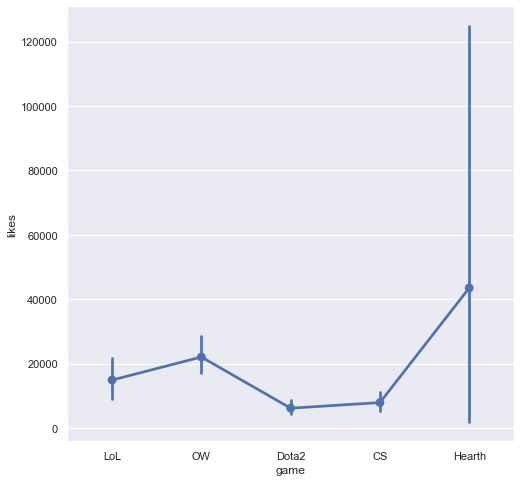

In [110]:
sns.pointplot(x="game", y="likes", data=new)

In [111]:
q9 = "SELECT * FROM new  WHERE publish_date  BETWEEN '2017-11-3'  AND  '2017-11-30';"
Nov = ps.sqldf(q9,locals())


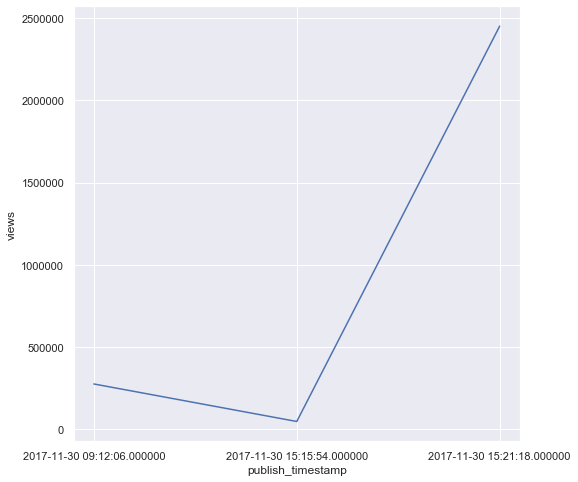

In [112]:
sns.lineplot(x="publish_timestamp", y = 'views', data=Nov)

In [121]:
qf = "SELECT * FROM new  WHERE publish_date  BETWEEN '2017-11-3'  AND  '2018-06-13';" 
All_Year = ps.sqldf(qf,locals())
All_Year.shape

(267, 26)

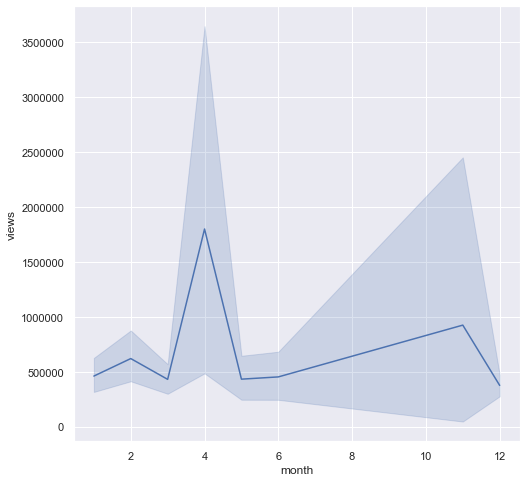

In [123]:
sns.lineplot(x="month", y = 'views', data=All_Year)

In [125]:
All_Year['engagement'] = sum(test1['likes'], test1['dislikes'])

In [126]:
All_Year.shape

(267, 27)

In [128]:
All_Year.head(3)

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,log_views,log_likes,log_dislikes,log_comment_count,publish_timestamp,game,month,engagement
0,E3_euEruQwg,2017-12-02,풍월량 상황극] 저격하지마라! LOL,풍월량,20,Gaming,2017-12-01,02:29:13,"게임|""풍월량""|""롤""|""영상""|""방송""|""스팀""|""신작""|""김영태""|""twitch...",13348,243,2,38,https://i.ytimg.com/vi/E3_euEruQwg/default.jpg,0,0,0,좋아요&구독 감사합니다(https://goo.gl/s14e16)\n재생목록모두보기(...,KR,9.499197,5.497168,1.098612,3.663562,2017-12-01 02:29:13.000000,LoL,12,5185863
1,c0ZoBqbFQqM,2017-12-03,Notre jeu | League of Legends,League of Legends - France,20,Gaming,2017-12-02,12:00:02,"Riot Games""|""League of Legends""|""LoL""|""sport""|...",25740,3352,19,409,https://i.ytimg.com/vi/c0ZoBqbFQqM/default.jpg,0,0,0,Ce n'est pas juste un sport. C'est notre sport...,FR,10.155840,8.117611,2.995732,6.016157,2017-12-02 12:00:02.000000,LoL,12,5185880
2,vzNcSvKCOyA,2017-12-03,Varus: As We Fall [OFFICIAL MUSIC VIDEO] | Lea...,League of Legends,20,Gaming,2017-11-30,15:21:18,"Riot Games|""Riot""|""League of Legends""|""League""...",2452418,99479,5240,12021,https://i.ytimg.com/vi/vzNcSvKCOyA/default.jpg,0,0,0,Witness the incarnation of vengeance. Part 2 o...,DE,14.712585,11.507712,8.564268,9.394494,2017-11-30 15:21:18.000000,LoL,11,5191101


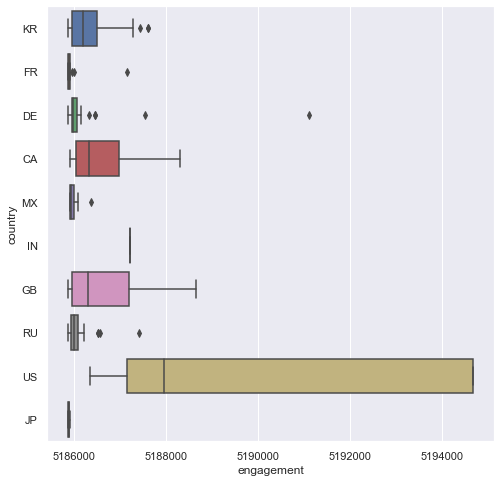

In [129]:
sns.boxplot(y = 'country', x = 'engagement', data = All_Year)

In [134]:
qz = "SELECT channel_title, engagement FROM All_Year GROUP BY channel_title ORDER BY engagement LIMIT 10;"
ps.sqldf(qz,locals())


,channel_title,engagement
0,악어 유튜브,5185861
1,DominGo Replays,5185862
2,OGN,5185863
3,풍월량,5185863
4,Dota2RuHub,5185864
5,LA Valiant,5185865
6,LoL eSports Pro,5185865
7,Overwatch League VODs,5185865
8,99DMGPLUS,5185866
9,Summoner's Inn,5185870


# What's the potential? What's missing?


### Potential

Channels to partner with


